This script contains the following:
1.Importing Visualization Libraries and Data
2.Data Wrangling
3.Exploring Relationships Correlations Scatterplots Pair Plots Categorical Plots


1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.5.2'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
#Import data
df = pd.read_pickle(r'/Users/joshd/Documents/Personal/CareerFoundry/Data Analytics Immersion/6/STI/02 Data/Prepared Data/STD Cases.pkl')

In [5]:
df.head

<bound method NDFrame.head of                               Disease    State  Year  Gender          Age  \
0                           Chlamydia  Alabama  1996    Male   0-14 years   
1                           Chlamydia  Alabama  1996    Male  15-19 years   
2                           Chlamydia  Alabama  1996    Male  20-24 years   
3                           Chlamydia  Alabama  1996    Male  25-29 years   
4                           Chlamydia  Alabama  1996    Male  30-34 years   
...                               ...      ...   ...     ...          ...   
42525  Primary and Secondary Syphilis  Wyoming  2004  Female  30-34 years   
42526  Primary and Secondary Syphilis  Wyoming  2007  Female    40+ years   
42527  Primary and Secondary Syphilis  Wyoming  2008  Female  20-24 years   
42528  Primary and Secondary Syphilis  Wyoming  2008  Female  30-34 years   
42529  Primary and Secondary Syphilis  Wyoming  2009  Female  25-29 years   

       STD Cases  Population  Rate per 100K  

2.Data Wrangling

In [6]:
# Filter the DataFrame to only include rows where Disease is Chlamydia
chlamydia_df = df[df['Disease'] == 'Chlamydia']

# Group by State and Year
chl_df = chlamydia_df.groupby(['State', 'Year']).sum()

# Calculate the mean of STD Cases columns for each State and Year
chl_df['STD Cases Mean'] = chlamydia_df.groupby(['State', 'Year'])['STD Cases'].mean()


# Calculate percent changes for population sum, STD Cases sum
chl_df['Population Percent Change'] = chl_df['Population'].pct_change()
chl_df['STD Cases Percent Change'] = chl_df['STD Cases'].pct_change()


# Set the percent change for Year 1996 to 0
chl_df.loc[(slice(None), 1996), ['Population Percent Change', 'STD Cases Percent Change']] = 0


chl_df.reset_index(inplace=True)

chl_df


,State,Year,STD Cases,Population,Rate per 100K,STD Cases Mean,Population Percent Change,STD Cases Percent Change
0,Alabama,1996,8283,4331102.0,4792.21,517.687500,0.000000,0.000000
1,Alabama,1997,8704,4367935.0,5188.38,435.200000,0.008504,0.050827
2,Alabama,1998,10065,4404701.0,6030.51,503.250000,0.008417,0.156365
3,Alabama,1999,12375,4430141.0,7462.94,538.043478,0.005776,0.229508
4,Alabama,2000,15323,4451975.0,9261.82,638.458333,0.004929,0.238222
...,...,...,...,...,...,...,...,...
964,Wyoming,2010,2113,563626.0,10612.61,150.928571,0.035563,0.076414
965,Wyoming,2011,2092,568158.0,10522.21,139.466667,0.008041,-0.009938
966,Wyoming,2012,2102,576412.0,10553.64,150.142857,0.014528,0.004780
967,Wyoming,2013,2005,523588.0,9943.89,133.666667,-0.091643,-0.046147


In [7]:
# drop rate per 100k
chl_df.drop(['Rate per 100K'], axis = 1, inplace = True)
chl_df

,State,Year,STD Cases,Population,STD Cases Mean,Population Percent Change,STD Cases Percent Change
0,Alabama,1996,8283,4331102.0,517.687500,0.000000,0.000000
1,Alabama,1997,8704,4367935.0,435.200000,0.008504,0.050827
2,Alabama,1998,10065,4404701.0,503.250000,0.008417,0.156365
3,Alabama,1999,12375,4430141.0,538.043478,0.005776,0.229508
4,Alabama,2000,15323,4451975.0,638.458333,0.004929,0.238222
...,...,...,...,...,...,...,...
964,Wyoming,2010,2113,563626.0,150.928571,0.035563,0.076414
965,Wyoming,2011,2092,568158.0,139.466667,0.008041,-0.009938
966,Wyoming,2012,2102,576412.0,150.142857,0.014528,0.004780
967,Wyoming,2013,2005,523588.0,133.666667,-0.091643,-0.046147


In [8]:
# Add a new column 'Rate per 100K' to the DataFrame
chl_df['Rate per 100K'] =chl_df['STD Cases'] /chl_df['Population'] * 100000
chl_df

,State,Year,STD Cases,Population,STD Cases Mean,Population Percent Change,STD Cases Percent Change,Rate per 100K
0,Alabama,1996,8283,4331102.0,517.687500,0.000000,0.000000,191.244630
1,Alabama,1997,8704,4367935.0,435.200000,0.008504,0.050827,199.270365
2,Alabama,1998,10065,4404701.0,503.250000,0.008417,0.156365,228.505862
3,Alabama,1999,12375,4430141.0,538.043478,0.005776,0.229508,279.336482
4,Alabama,2000,15323,4451975.0,638.458333,0.004929,0.238222,344.184323
...,...,...,...,...,...,...,...,...
964,Wyoming,2010,2113,563626.0,150.928571,0.035563,0.076414,374.893990
965,Wyoming,2011,2092,568158.0,139.466667,0.008041,-0.009938,368.207435
966,Wyoming,2012,2102,576412.0,150.142857,0.014528,0.004780,364.669715
967,Wyoming,2013,2005,523588.0,133.666667,-0.091643,-0.046147,382.934674


In [9]:
#save dataset as Pickle
chl_df.to_pickle('/Users/joshd/Documents/Personal/CareerFoundry/Data Analytics Immersion/6/STI/02 Data/Prepared Data/chlamydia.pkl')

In [10]:
# Filter the DataFrame to only include rows where Disease is Gonorrhea
gonorrhea_df = df[df['Disease'] == 'Gonorrhea']

# Group by State and Year
gon_df = gonorrhea_df.groupby(['State', 'Year']).sum()

# Calculate the mean of STD Cases column for each State and Year
gon_df['STD Cases Mean'] = gonorrhea_df.groupby(['State', 'Year'])['STD Cases'].mean()

# Calculate percent changes for population sum, STD Cases sum, and Rate per 100K sum
gon_df['Population Percent Change'] = gon_df['Population'].pct_change()
gon_df['STD Cases Percent Change'] = gon_df['STD Cases'].pct_change()

# Set the percent change for Year 1996 to 0
gon_df.loc[(slice(None), 1996), ['Population Percent Change', 'STD Cases Percent Change']] = 0


gon_df.reset_index(inplace=True)

gon_df


,State,Year,STD Cases,Population,Rate per 100K,STD Cases Mean,Population Percent Change,STD Cases Percent Change
0,Alabama,1996,13138,4331102.0,7632.56,821.125000,0.000000,0.000000
1,Alabama,1997,12031,4367935.0,7061.96,601.550000,0.008504,-0.084259
2,Alabama,1998,12737,4404701.0,7492.29,636.850000,0.008417,0.058682
3,Alabama,1999,10888,4430141.0,6389.21,518.476190,0.005776,-0.145168
4,Alabama,2000,12063,4451975.0,7118.50,524.478261,0.004929,0.107917
...,...,...,...,...,...,...,...,...
964,Wyoming,2010,40,302000.0,194.12,4.000000,-0.304562,-0.459459
965,Wyoming,2011,46,435306.0,222.48,4.181818,0.441411,0.150000
966,Wyoming,2012,44,462639.0,198.39,3.666667,0.062790,-0.043478
967,Wyoming,2013,66,332191.0,306.54,6.000000,-0.281965,0.500000


In [11]:
# drop rate per 100k
gon_df.drop(['Rate per 100K'], axis = 1, inplace = True)
gon_df

,State,Year,STD Cases,Population,STD Cases Mean,Population Percent Change,STD Cases Percent Change
0,Alabama,1996,13138,4331102.0,821.125000,0.000000,0.000000
1,Alabama,1997,12031,4367935.0,601.550000,0.008504,-0.084259
2,Alabama,1998,12737,4404701.0,636.850000,0.008417,0.058682
3,Alabama,1999,10888,4430141.0,518.476190,0.005776,-0.145168
4,Alabama,2000,12063,4451975.0,524.478261,0.004929,0.107917
...,...,...,...,...,...,...,...
964,Wyoming,2010,40,302000.0,4.000000,-0.304562,-0.459459
965,Wyoming,2011,46,435306.0,4.181818,0.441411,0.150000
966,Wyoming,2012,44,462639.0,3.666667,0.062790,-0.043478
967,Wyoming,2013,66,332191.0,6.000000,-0.281965,0.500000


In [12]:
# Add a new column 'Rate per 100K' to the DataFrame
gon_df['Rate per 100K'] =gon_df['STD Cases'] /gon_df['Population'] * 100000
gon_df

,State,Year,STD Cases,Population,STD Cases Mean,Population Percent Change,STD Cases Percent Change,Rate per 100K
0,Alabama,1996,13138,4331102.0,821.125000,0.000000,0.000000,303.340813
1,Alabama,1997,12031,4367935.0,601.550000,0.008504,-0.084259,275.439080
2,Alabama,1998,12737,4404701.0,636.850000,0.008417,0.058682,289.168323
3,Alabama,1999,10888,4430141.0,518.476190,0.005776,-0.145168,245.770959
4,Alabama,2000,12063,4451975.0,524.478261,0.004929,0.107917,270.958395
...,...,...,...,...,...,...,...,...
964,Wyoming,2010,40,302000.0,4.000000,-0.304562,-0.459459,13.245033
965,Wyoming,2011,46,435306.0,4.181818,0.441411,0.150000,10.567279
966,Wyoming,2012,44,462639.0,3.666667,0.062790,-0.043478,9.510655
967,Wyoming,2013,66,332191.0,6.000000,-0.281965,0.500000,19.868088


In [13]:
#save dataset as Pickle
gon_df.to_pickle('/Users/joshd/Documents/Personal/CareerFoundry/Data Analytics Immersion/6/STI/02 Data/Prepared Data/gonorrhea.pkl')

In [14]:
# Filter the DataFrame to only include rows where Disease is Primary and Secondary Syphilis
syphilis_df = df[df['Disease'] == 'Primary and Secondary Syphilis']

# Group by State and Year
syp_df = syphilis_df.groupby(['State', 'Year']).sum()

# Calculate the mean of STD Cases for each State and Year
syp_df['STD Cases Mean'] = syphilis_df.groupby(['State', 'Year'])['STD Cases'].mean()

# Calculate percent changes for population sum, STD Cases sum
syp_df['Population Percent Change'] = syp_df['Population'].pct_change()
syp_df['STD Cases Percent Change'] = syp_df['STD Cases'].pct_change()

# Set the percent change for Year 1996 to 0
syp_df.loc[(slice(None), 1996), ['Population Percent Change', 'STD Cases Percent Change']] = 0


syp_df.reset_index(inplace=True)

syp_df

,State,Year,STD Cases,Population,Rate per 100K,STD Cases Mean,Population Percent Change,STD Cases Percent Change
0,Alabama,1996,528,4331102.0,266.48,35.200000,0.000000,0.000000
1,Alabama,1997,410,4367935.0,208.51,29.285714,0.008504,-0.223485
2,Alabama,1998,274,3932336.0,145.90,21.076923,-0.099727,-0.331707
3,Alabama,1999,202,4430141.0,101.32,14.428571,0.126593,-0.262774
4,Alabama,2000,123,3531717.0,62.31,10.250000,-0.202798,-0.391089
...,...,...,...,...,...,...,...,...
922,Wyoming,2008,3,154562.0,12.75,1.000000,-0.446805,-0.250000
923,Wyoming,2009,3,58827.0,15.49,1.000000,-0.619395,0.000000
924,Wyoming,2012,4,59690.0,20.39,1.333333,0.014670,0.333333
925,Wyoming,2013,1,22834.0,4.38,1.000000,-0.617457,-0.750000


In [15]:
# drop rate per 100k
syp_df.drop(['Rate per 100K'], axis = 1, inplace = True)
syp_df

,State,Year,STD Cases,Population,STD Cases Mean,Population Percent Change,STD Cases Percent Change
0,Alabama,1996,528,4331102.0,35.200000,0.000000,0.000000
1,Alabama,1997,410,4367935.0,29.285714,0.008504,-0.223485
2,Alabama,1998,274,3932336.0,21.076923,-0.099727,-0.331707
3,Alabama,1999,202,4430141.0,14.428571,0.126593,-0.262774
4,Alabama,2000,123,3531717.0,10.250000,-0.202798,-0.391089
...,...,...,...,...,...,...,...
922,Wyoming,2008,3,154562.0,1.000000,-0.446805,-0.250000
923,Wyoming,2009,3,58827.0,1.000000,-0.619395,0.000000
924,Wyoming,2012,4,59690.0,1.333333,0.014670,0.333333
925,Wyoming,2013,1,22834.0,1.000000,-0.617457,-0.750000


In [16]:
# Add a new column 'Rate per 100K' to the DataFrame
syp_df['Rate per 100K'] =syp_df['STD Cases'] /syp_df['Population'] * 100000
syp_df

,State,Year,STD Cases,Population,STD Cases Mean,Population Percent Change,STD Cases Percent Change,Rate per 100K
0,Alabama,1996,528,4331102.0,35.200000,0.000000,0.000000,12.190893
1,Alabama,1997,410,4367935.0,29.285714,0.008504,-0.223485,9.386587
2,Alabama,1998,274,3932336.0,21.076923,-0.099727,-0.331707,6.967868
3,Alabama,1999,202,4430141.0,14.428571,0.126593,-0.262774,4.559674
4,Alabama,2000,123,3531717.0,10.250000,-0.202798,-0.391089,3.482725
...,...,...,...,...,...,...,...,...
922,Wyoming,2008,3,154562.0,1.000000,-0.446805,-0.250000,1.940969
923,Wyoming,2009,3,58827.0,1.000000,-0.619395,0.000000,5.099699
924,Wyoming,2012,4,59690.0,1.333333,0.014670,0.333333,6.701290
925,Wyoming,2013,1,22834.0,1.000000,-0.617457,-0.750000,4.379434


In [17]:
#save dataset as Pickle
syp_df.to_pickle('/Users/joshd/Documents/Personal/CareerFoundry/Data Analytics Immersion/6/STI/02 Data/Prepared Data/syphilis.pkl')

In [18]:
# Create Totals dataframe
sum_df = (
    syp_df.groupby(['State', 'Year'])[['STD Cases']].sum() +
    gon_df.groupby(['State', 'Year'])[['STD Cases']].sum() +
    chl_df.groupby(['State', 'Year'])[['STD Cases']].sum()
)

sum_df = sum_df.reset_index().fillna(0)
sum_df

,State,Year,STD Cases
0,Alabama,1996,21949.0
1,Alabama,1997,21145.0
2,Alabama,1998,23076.0
3,Alabama,1999,23465.0
4,Alabama,2000,27509.0
...,...,...,...
964,Wyoming,2010,0.0
965,Wyoming,2011,0.0
966,Wyoming,2012,2150.0
967,Wyoming,2013,2072.0


In [19]:
#merge to add population and population percent change

sum_df = sum_df.drop_duplicates(["State", "Year"])
chl_df = chl_df.drop_duplicates(["State", "Year"])
inner_joined_total = sum_df.join(
    chl_df.set_index(["State","Year"]),
     on=["State", "Year"],
     how="inner",
     lsuffix="_x",
    rsuffix="_y",
 )

inner_joined_total


,State,Year,STD Cases_x,STD Cases_y,Population,STD Cases Mean,Population Percent Change,STD Cases Percent Change,Rate per 100K
0,Alabama,1996,21949.0,8283,4331102.0,517.687500,0.000000,0.000000,191.244630
1,Alabama,1997,21145.0,8704,4367935.0,435.200000,0.008504,0.050827,199.270365
2,Alabama,1998,23076.0,10065,4404701.0,503.250000,0.008417,0.156365,228.505862
3,Alabama,1999,23465.0,12375,4430141.0,538.043478,0.005776,0.229508,279.336482
4,Alabama,2000,27509.0,15323,4451975.0,638.458333,0.004929,0.238222,344.184323
...,...,...,...,...,...,...,...,...,...
964,Wyoming,2010,0.0,2113,563626.0,150.928571,0.035563,0.076414,374.893990
965,Wyoming,2011,0.0,2092,568158.0,139.466667,0.008041,-0.009938,368.207435
966,Wyoming,2012,2150.0,2102,576412.0,150.142857,0.014528,0.004780,364.669715
967,Wyoming,2013,2072.0,2005,523588.0,133.666667,-0.091643,-0.046147,382.934674


In [20]:
inner_joined_total = inner_joined_total.reset_index(drop=True)
inner_joined_total

,State,Year,STD Cases_x,STD Cases_y,Population,STD Cases Mean,Population Percent Change,STD Cases Percent Change,Rate per 100K
0,Alabama,1996,21949.0,8283,4331102.0,517.687500,0.000000,0.000000,191.244630
1,Alabama,1997,21145.0,8704,4367935.0,435.200000,0.008504,0.050827,199.270365
2,Alabama,1998,23076.0,10065,4404701.0,503.250000,0.008417,0.156365,228.505862
3,Alabama,1999,23465.0,12375,4430141.0,538.043478,0.005776,0.229508,279.336482
4,Alabama,2000,27509.0,15323,4451975.0,638.458333,0.004929,0.238222,344.184323
...,...,...,...,...,...,...,...,...,...
964,Wyoming,2010,0.0,2113,563626.0,150.928571,0.035563,0.076414,374.893990
965,Wyoming,2011,0.0,2092,568158.0,139.466667,0.008041,-0.009938,368.207435
966,Wyoming,2012,2150.0,2102,576412.0,150.142857,0.014528,0.004780,364.669715
967,Wyoming,2013,2072.0,2005,523588.0,133.666667,-0.091643,-0.046147,382.934674


In [21]:
#Drop Columns
inner_joined_total.drop(['STD Cases_y','Rate per 100K','STD Cases Mean','STD Cases Percent Change'], axis = 1, inplace = True)
inner_joined_total

,State,Year,STD Cases_x,Population,Population Percent Change
0,Alabama,1996,21949.0,4331102.0,0.000000
1,Alabama,1997,21145.0,4367935.0,0.008504
2,Alabama,1998,23076.0,4404701.0,0.008417
3,Alabama,1999,23465.0,4430141.0,0.005776
4,Alabama,2000,27509.0,4451975.0,0.004929
...,...,...,...,...,...
964,Wyoming,2010,0.0,563626.0,0.035563
965,Wyoming,2011,0.0,568158.0,0.008041
966,Wyoming,2012,2150.0,576412.0,0.014528
967,Wyoming,2013,2072.0,523588.0,-0.091643


In [22]:
inner_joined_total.rename(columns={"STD Cases_x": "STD Cases"}, inplace = True)
inner_joined_total

,State,Year,STD Cases,Population,Population Percent Change
0,Alabama,1996,21949.0,4331102.0,0.000000
1,Alabama,1997,21145.0,4367935.0,0.008504
2,Alabama,1998,23076.0,4404701.0,0.008417
3,Alabama,1999,23465.0,4430141.0,0.005776
4,Alabama,2000,27509.0,4451975.0,0.004929
...,...,...,...,...,...
964,Wyoming,2010,0.0,563626.0,0.035563
965,Wyoming,2011,0.0,568158.0,0.008041
966,Wyoming,2012,2150.0,576412.0,0.014528
967,Wyoming,2013,2072.0,523588.0,-0.091643


In [23]:
# Calculate percent changes for population sum, STD Cases sum
inner_joined_total['STD Cases Percent Change'] = inner_joined_total['STD Cases'].pct_change()

# Set the percent change for Year 1996 to 0
inner_joined_total.loc[inner_joined_total['Year'] == 1996, ['STD Cases Percent Change']] = 0

inner_joined_total.reset_index(inplace=False)

inner_joined_total


,State,Year,STD Cases,Population,Population Percent Change,STD Cases Percent Change
0,Alabama,1996,21949.0,4331102.0,0.000000,0.000000
1,Alabama,1997,21145.0,4367935.0,0.008504,-0.036630
2,Alabama,1998,23076.0,4404701.0,0.008417,0.091322
3,Alabama,1999,23465.0,4430141.0,0.005776,0.016857
4,Alabama,2000,27509.0,4451975.0,0.004929,0.172342
...,...,...,...,...,...,...
964,Wyoming,2010,0.0,563626.0,0.035563,-1.000000
965,Wyoming,2011,0.0,568158.0,0.008041,NaN
966,Wyoming,2012,2150.0,576412.0,0.014528,inf
967,Wyoming,2013,2072.0,523588.0,-0.091643,-0.036279


In [24]:
# Add a new column 'Rate per 100K' to the DataFrame
inner_joined_total['Rate per 100K'] =inner_joined_total['STD Cases'] /inner_joined_total['Population'] * 100000
inner_joined_total

,State,Year,STD Cases,Population,Population Percent Change,STD Cases Percent Change,Rate per 100K
0,Alabama,1996,21949.0,4331102.0,0.000000,0.000000,506.776335
1,Alabama,1997,21145.0,4367935.0,0.008504,-0.036630,484.096032
2,Alabama,1998,23076.0,4404701.0,0.008417,0.091322,523.894811
3,Alabama,1999,23465.0,4430141.0,0.005776,0.016857,529.667114
4,Alabama,2000,27509.0,4451975.0,0.004929,0.172342,617.905536
...,...,...,...,...,...,...,...
964,Wyoming,2010,0.0,563626.0,0.035563,-1.000000,0.000000
965,Wyoming,2011,0.0,568158.0,0.008041,NaN,0.000000
966,Wyoming,2012,2150.0,576412.0,0.014528,inf,372.997092
967,Wyoming,2013,2072.0,523588.0,-0.091643,-0.036279,395.730995


In [25]:
# Add a new column STD Cases Mean to the DataFrame
mean_value = inner_joined_total.groupby(['State'])[['STD Cases']].mean()

merged_df = pd.merge(inner_joined_total, mean_value, on=['State'])

merged_df['STD Cases Mean'] = merged_df['STD Cases_y']

merged_df.drop(columns=['STD Cases_y'], inplace=True)

merged_df.rename(columns={'STD Cases_x': 'STD Cases'}, inplace=True)

merged_df

,State,Year,STD Cases,Population,Population Percent Change,STD Cases Percent Change,Rate per 100K,STD Cases Mean
0,Alabama,1996,21949.0,4331102.0,0.000000,0.000000,506.776335,29956.526316
1,Alabama,1997,21145.0,4367935.0,0.008504,-0.036630,484.096032,29956.526316
2,Alabama,1998,23076.0,4404701.0,0.008417,0.091322,523.894811,29956.526316
3,Alabama,1999,23465.0,4430141.0,0.005776,0.016857,529.667114,29956.526316
4,Alabama,2000,27509.0,4451975.0,0.004929,0.172342,617.905536,29956.526316
...,...,...,...,...,...,...,...,...
964,Wyoming,2010,0.0,563626.0,0.035563,-1.000000,0.000000,825.684211
965,Wyoming,2011,0.0,568158.0,0.008041,NaN,0.000000,825.684211
966,Wyoming,2012,2150.0,576412.0,0.014528,inf,372.997092,825.684211
967,Wyoming,2013,2072.0,523588.0,-0.091643,-0.036279,395.730995,825.684211


In [26]:
# Replace infinite updated data with nan
merged_df.replace([np.inf, -np.inf], np.nan, inplace=True)

merged_df

,State,Year,STD Cases,Population,Population Percent Change,STD Cases Percent Change,Rate per 100K,STD Cases Mean
0,Alabama,1996,21949.0,4331102.0,0.000000,0.000000,506.776335,29956.526316
1,Alabama,1997,21145.0,4367935.0,0.008504,-0.036630,484.096032,29956.526316
2,Alabama,1998,23076.0,4404701.0,0.008417,0.091322,523.894811,29956.526316
3,Alabama,1999,23465.0,4430141.0,0.005776,0.016857,529.667114,29956.526316
4,Alabama,2000,27509.0,4451975.0,0.004929,0.172342,617.905536,29956.526316
...,...,...,...,...,...,...,...,...
964,Wyoming,2010,0.0,563626.0,0.035563,-1.000000,0.000000,825.684211
965,Wyoming,2011,0.0,568158.0,0.008041,NaN,0.000000,825.684211
966,Wyoming,2012,2150.0,576412.0,0.014528,NaN,372.997092,825.684211
967,Wyoming,2013,2072.0,523588.0,-0.091643,-0.036279,395.730995,825.684211


In [27]:
# Replace on multiple columns to change Nan to 0
merged_df[["STD Cases Percent Change", "Rate per 100K"]] = merged_df[["STD Cases Percent Change", "Rate per 100K"]].fillna(0)
merged_df                

,State,Year,STD Cases,Population,Population Percent Change,STD Cases Percent Change,Rate per 100K,STD Cases Mean
0,Alabama,1996,21949.0,4331102.0,0.000000,0.000000,506.776335,29956.526316
1,Alabama,1997,21145.0,4367935.0,0.008504,-0.036630,484.096032,29956.526316
2,Alabama,1998,23076.0,4404701.0,0.008417,0.091322,523.894811,29956.526316
3,Alabama,1999,23465.0,4430141.0,0.005776,0.016857,529.667114,29956.526316
4,Alabama,2000,27509.0,4451975.0,0.004929,0.172342,617.905536,29956.526316
...,...,...,...,...,...,...,...,...
964,Wyoming,2010,0.0,563626.0,0.035563,-1.000000,0.000000,825.684211
965,Wyoming,2011,0.0,568158.0,0.008041,0.000000,0.000000,825.684211
966,Wyoming,2012,2150.0,576412.0,0.014528,0.000000,372.997092,825.684211
967,Wyoming,2013,2072.0,523588.0,-0.091643,-0.036279,395.730995,825.684211


##Correlations

In [28]:
merged_df.corr()

,Year,STD Cases,Population,Population Percent Change,STD Cases Percent Change,Rate per 100K,STD Cases Mean
Year,1.000000e+00,0.189382,0.054776,-0.030037,0.008845,0.378440,-2.941469e-14
STD Cases,1.893819e-01,1.000000,0.949456,0.022254,0.091586,0.298017,9.477737e-01
Population,5.477580e-02,0.949456,1.000000,0.063634,0.090400,0.130273,9.689009e-01
Population Percent Change,-3.003654e-02,0.022254,0.063634,1.000000,0.058069,-0.022421,6.190032e-02
STD Cases Percent Change,8.844938e-03,0.091586,0.090400,0.058069,1.000000,0.222420,8.654530e-02
Rate per 100K,3.784403e-01,0.298017,0.130273,-0.022421,0.222420,1.000000,2.310636e-01
STD Cases Mean,-2.941469e-14,0.947774,0.968901,0.061900,0.086545,0.231064,1.000000e+00


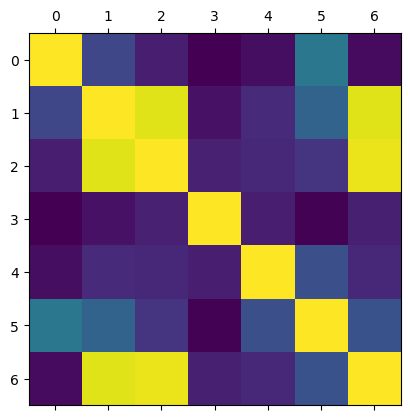

In [29]:
# Create a correlation heatmap using matplotlib
plt.matshow(merged_df.corr())
plt.show()

[Text(0, 0.5, 'Year'),
 Text(0, 1.5, 'STI Cases'),
 Text(0, 2.5, 'Population'),
 Text(0, 3.5, 'Population % Change'),
 Text(0, 4.5, 'STI Cases % Change'),
 Text(0, 5.5, 'Rate per 100K'),
 Text(0, 6.5, 'STI Cases Mean')]

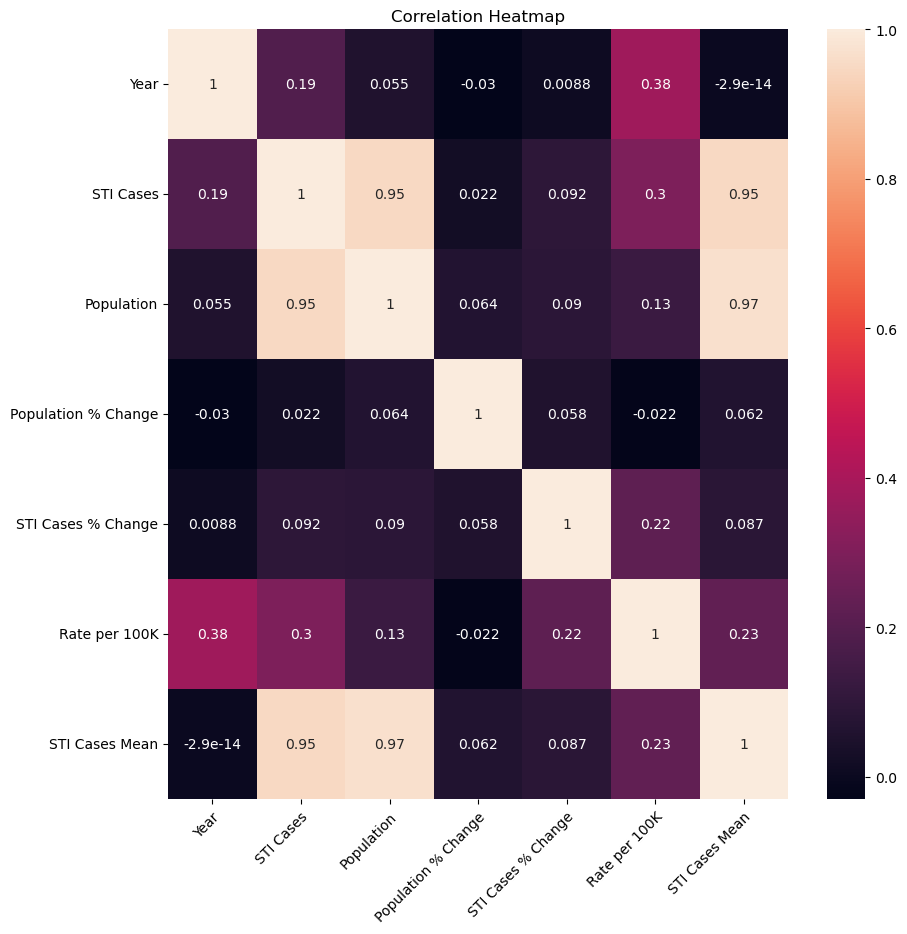

In [30]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(merged_df.corr(), annot = True, ax = ax) 
ax.set_title("Correlation Heatmap")
ax.set_xticklabels(["Year", "STI Cases","Population", "Population % Change", "STI Cases % Change", "Rate per 100K", "STI Cases Mean"],ha='right', rotation_mode='anchor', rotation=45)
ax.set_yticklabels(["Year","STI Cases", "Population", "Population % Change", "STI Cases % Change", "Rate per 100K", "STI Cases Mean"])

###Correlations: STD cases are not strongly correlated with any other variables.
Same with rate per 100K
Population is strongly correlated with STD Cases.
Population Perent Change is not strongly correlated.
STD Cases are strongly correlated with Rate per 100k Percent Changes. 

Violin Plots

<AxesSubplot:xlabel='Disease', ylabel='Rate per 100K'>

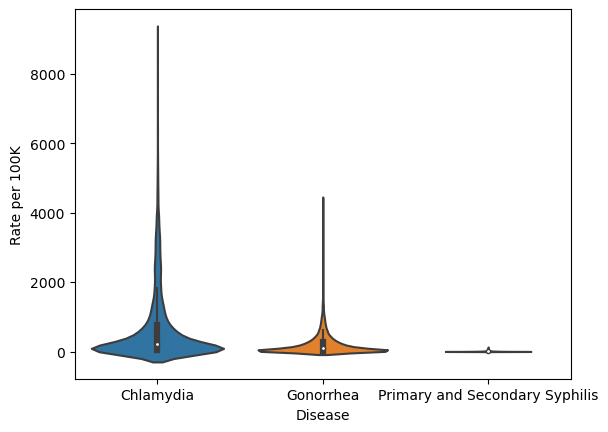

In [31]:
sns.violinplot(data=df, x="Disease", y="Rate per 100K", scale="count")

<AxesSubplot:xlabel='Gender', ylabel='STD Cases'>

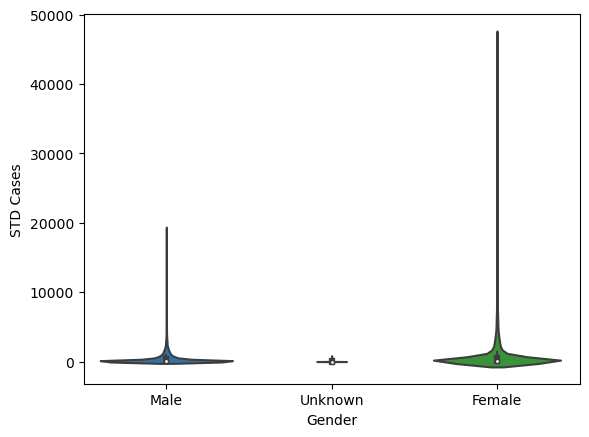

In [32]:
sns.violinplot(data=df, x="Gender", y="STD Cases", scale="count")

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '0-14 years'),
  Text(1, 0, '15-19 years'),
  Text(2, 0, '20-24 years'),
  Text(3, 0, '25-29 years'),
  Text(4, 0, '30-34 years'),
  Text(5, 0, '35-39 years'),
  Text(6, 0, '40+ years'),
  Text(7, 0, 'Unknown')])

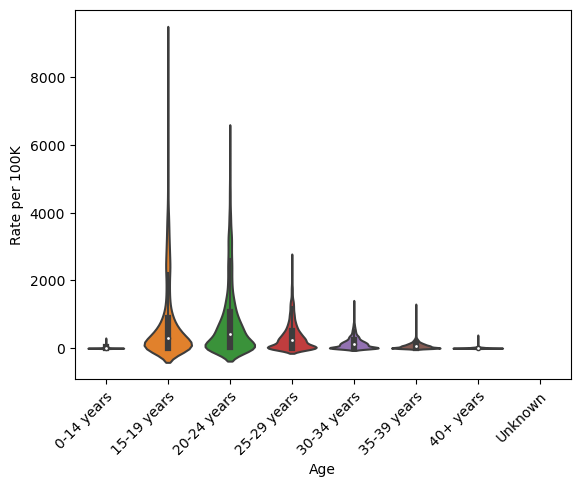

In [33]:
sns.violinplot(data=df, x="Age", y="Rate per 100K", scale="count")
plt.xticks(ha = 'right',rotation_mode='anchor', rotation = 45)

Histograms

Text(0.5, 0, 'STD Cases')

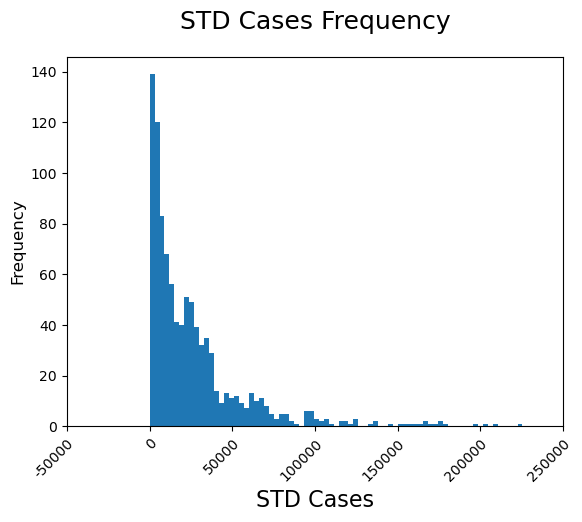

In [34]:
STDcases_hist = merged_df['STD Cases'].plot.hist(bins = 75)
plt.title('STD Cases Frequency', fontsize = 18, pad=20)
plt.ylabel('Frequency', fontsize = 12)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(ticks=plt.xticks()[0], labels=plt.xticks()[0].astype(int))
plt.xticks(ha = 'right',rotation_mode='anchor', rotation = 45)
plt.xlabel('STD Cases',  fontsize = 16)

Bar Graphs

In [35]:
#crosstab cases by year by gender
cases_by_year_gender_df = pd.crosstab(df.Year, df.Gender, values = df['STD Cases'],aggfunc ='sum')
cases_by_year_gender_df

Gender,Female,Male,Unknown
Year,,,
1996,583161,248055,5
1997,617528,255151,224
1998,686032,284390,1193
1999,722852,305227,1382
2000,753089,321895,2607
2001,809790,338565,2630
2002,834045,356343,2813
2003,860464,356306,2989
2004,890072,374421,3081


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1996'),
  Text(1, 0, '1997'),
  Text(2, 0, '1998'),
  Text(3, 0, '1999'),
  Text(4, 0, '2000'),
  Text(5, 0, '2001'),
  Text(6, 0, '2002'),
  Text(7, 0, '2003'),
  Text(8, 0, '2004'),
  Text(9, 0, '2005'),
  Text(10, 0, '2006'),
  Text(11, 0, '2007'),
  Text(12, 0, '2008'),
  Text(13, 0, '2009'),
  Text(14, 0, '2010'),
  Text(15, 0, '2011'),
  Text(16, 0, '2012'),
  Text(17, 0, '2013'),
  Text(18, 0, '2014')])

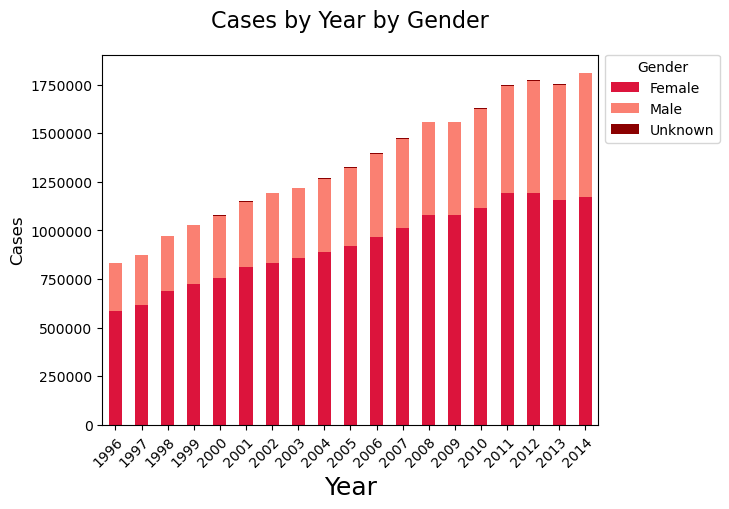

In [36]:
bar_cases_by_year_gender = cases_by_year_gender_df.plot(kind = 'bar', stacked =True, rot = 0, color= ['crimson','salmon','darkred'])
bar_cases_by_year_gender.legend(title='Gender', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Cases by Year by Gender', fontsize = 16, pad=20)
plt.ylabel('Cases', fontsize = 12)
plt.xlabel('Year',  fontsize = 18)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(ha = 'right',rotation_mode='anchor', rotation = 45)

In [37]:
#Create Cases crosstab by disease by year df
disease_by_year_df = pd.crosstab(df.Year, df.Disease, values = df['STD Cases'],aggfunc ='sum')
disease_by_year_df

Disease,Chlamydia,Gonorrhea,Primary and Secondary Syphilis
Year,,,
1996,492084,327723,11414
1997,537384,326971,8548
1998,608490,356107,7018
1999,662250,360598,6613
2000,708698,362920,5973
2001,783127,361758,6100
2002,834503,351836,6862
2003,877478,335104,7177
2004,929462,330132,7980


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1996'),
  Text(1, 0, '1997'),
  Text(2, 0, '1998'),
  Text(3, 0, '1999'),
  Text(4, 0, '2000'),
  Text(5, 0, '2001'),
  Text(6, 0, '2002'),
  Text(7, 0, '2003'),
  Text(8, 0, '2004'),
  Text(9, 0, '2005'),
  Text(10, 0, '2006'),
  Text(11, 0, '2007'),
  Text(12, 0, '2008'),
  Text(13, 0, '2009'),
  Text(14, 0, '2010'),
  Text(15, 0, '2011'),
  Text(16, 0, '2012'),
  Text(17, 0, '2013'),
  Text(18, 0, '2014')])

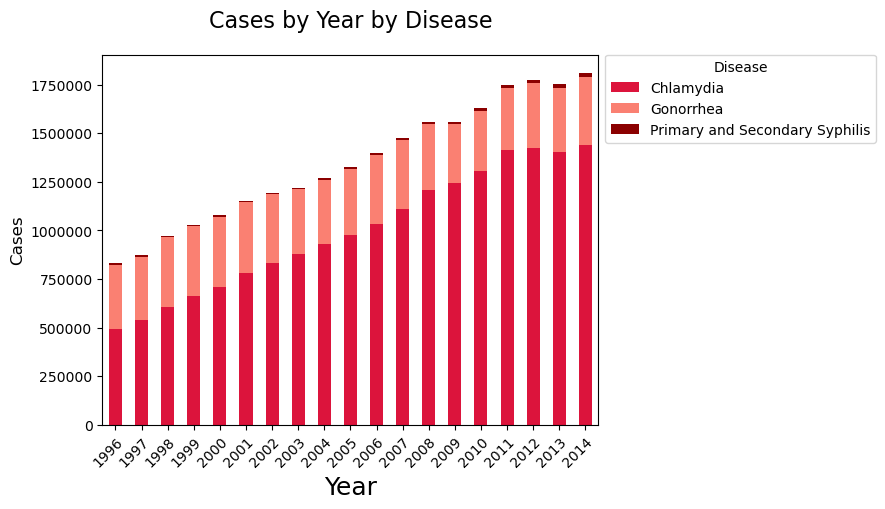

In [38]:
#Bar graph with labels
disease_by_year_df = disease_by_year_df.plot(kind = 'bar', stacked =True, rot = 0, color= ['crimson','salmon','darkred'])
disease_by_year_df.legend(title='Disease', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Cases by Year by Disease', fontsize = 16, pad=20)
plt.ylabel('Cases', fontsize = 12)
plt.xlabel('Year',  fontsize = 18)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(ha = 'right',rotation_mode='anchor', rotation = 45)

Scatterplots

In [39]:
merged_df

,State,Year,STD Cases,Population,Population Percent Change,STD Cases Percent Change,Rate per 100K,STD Cases Mean
0,Alabama,1996,21949.0,4331102.0,0.000000,0.000000,506.776335,29956.526316
1,Alabama,1997,21145.0,4367935.0,0.008504,-0.036630,484.096032,29956.526316
2,Alabama,1998,23076.0,4404701.0,0.008417,0.091322,523.894811,29956.526316
3,Alabama,1999,23465.0,4430141.0,0.005776,0.016857,529.667114,29956.526316
4,Alabama,2000,27509.0,4451975.0,0.004929,0.172342,617.905536,29956.526316
...,...,...,...,...,...,...,...,...
964,Wyoming,2010,0.0,563626.0,0.035563,-1.000000,0.000000,825.684211
965,Wyoming,2011,0.0,568158.0,0.008041,0.000000,0.000000,825.684211
966,Wyoming,2012,2150.0,576412.0,0.014528,0.000000,372.997092,825.684211
967,Wyoming,2013,2072.0,523588.0,-0.091643,-0.036279,395.730995,825.684211


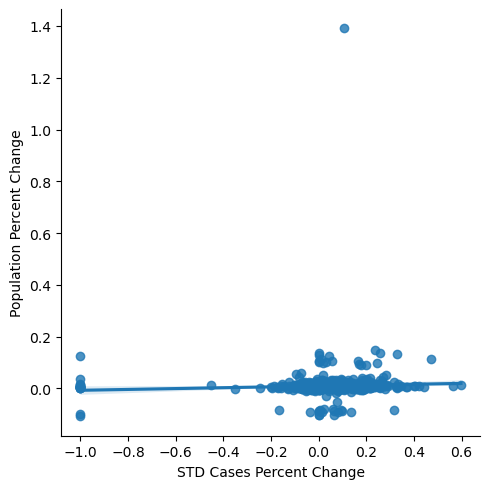

In [40]:
# Create a scatterplot for the "population" and "STD cases" columns in seaborn
sns.lmplot(x = 'STD Cases Percent Change', y = 'Population Percent Change', data = merged_df)

##The scatterplot shows a high correlation between the two variables. As population changes, STD cases are doing the same.


PairPlots

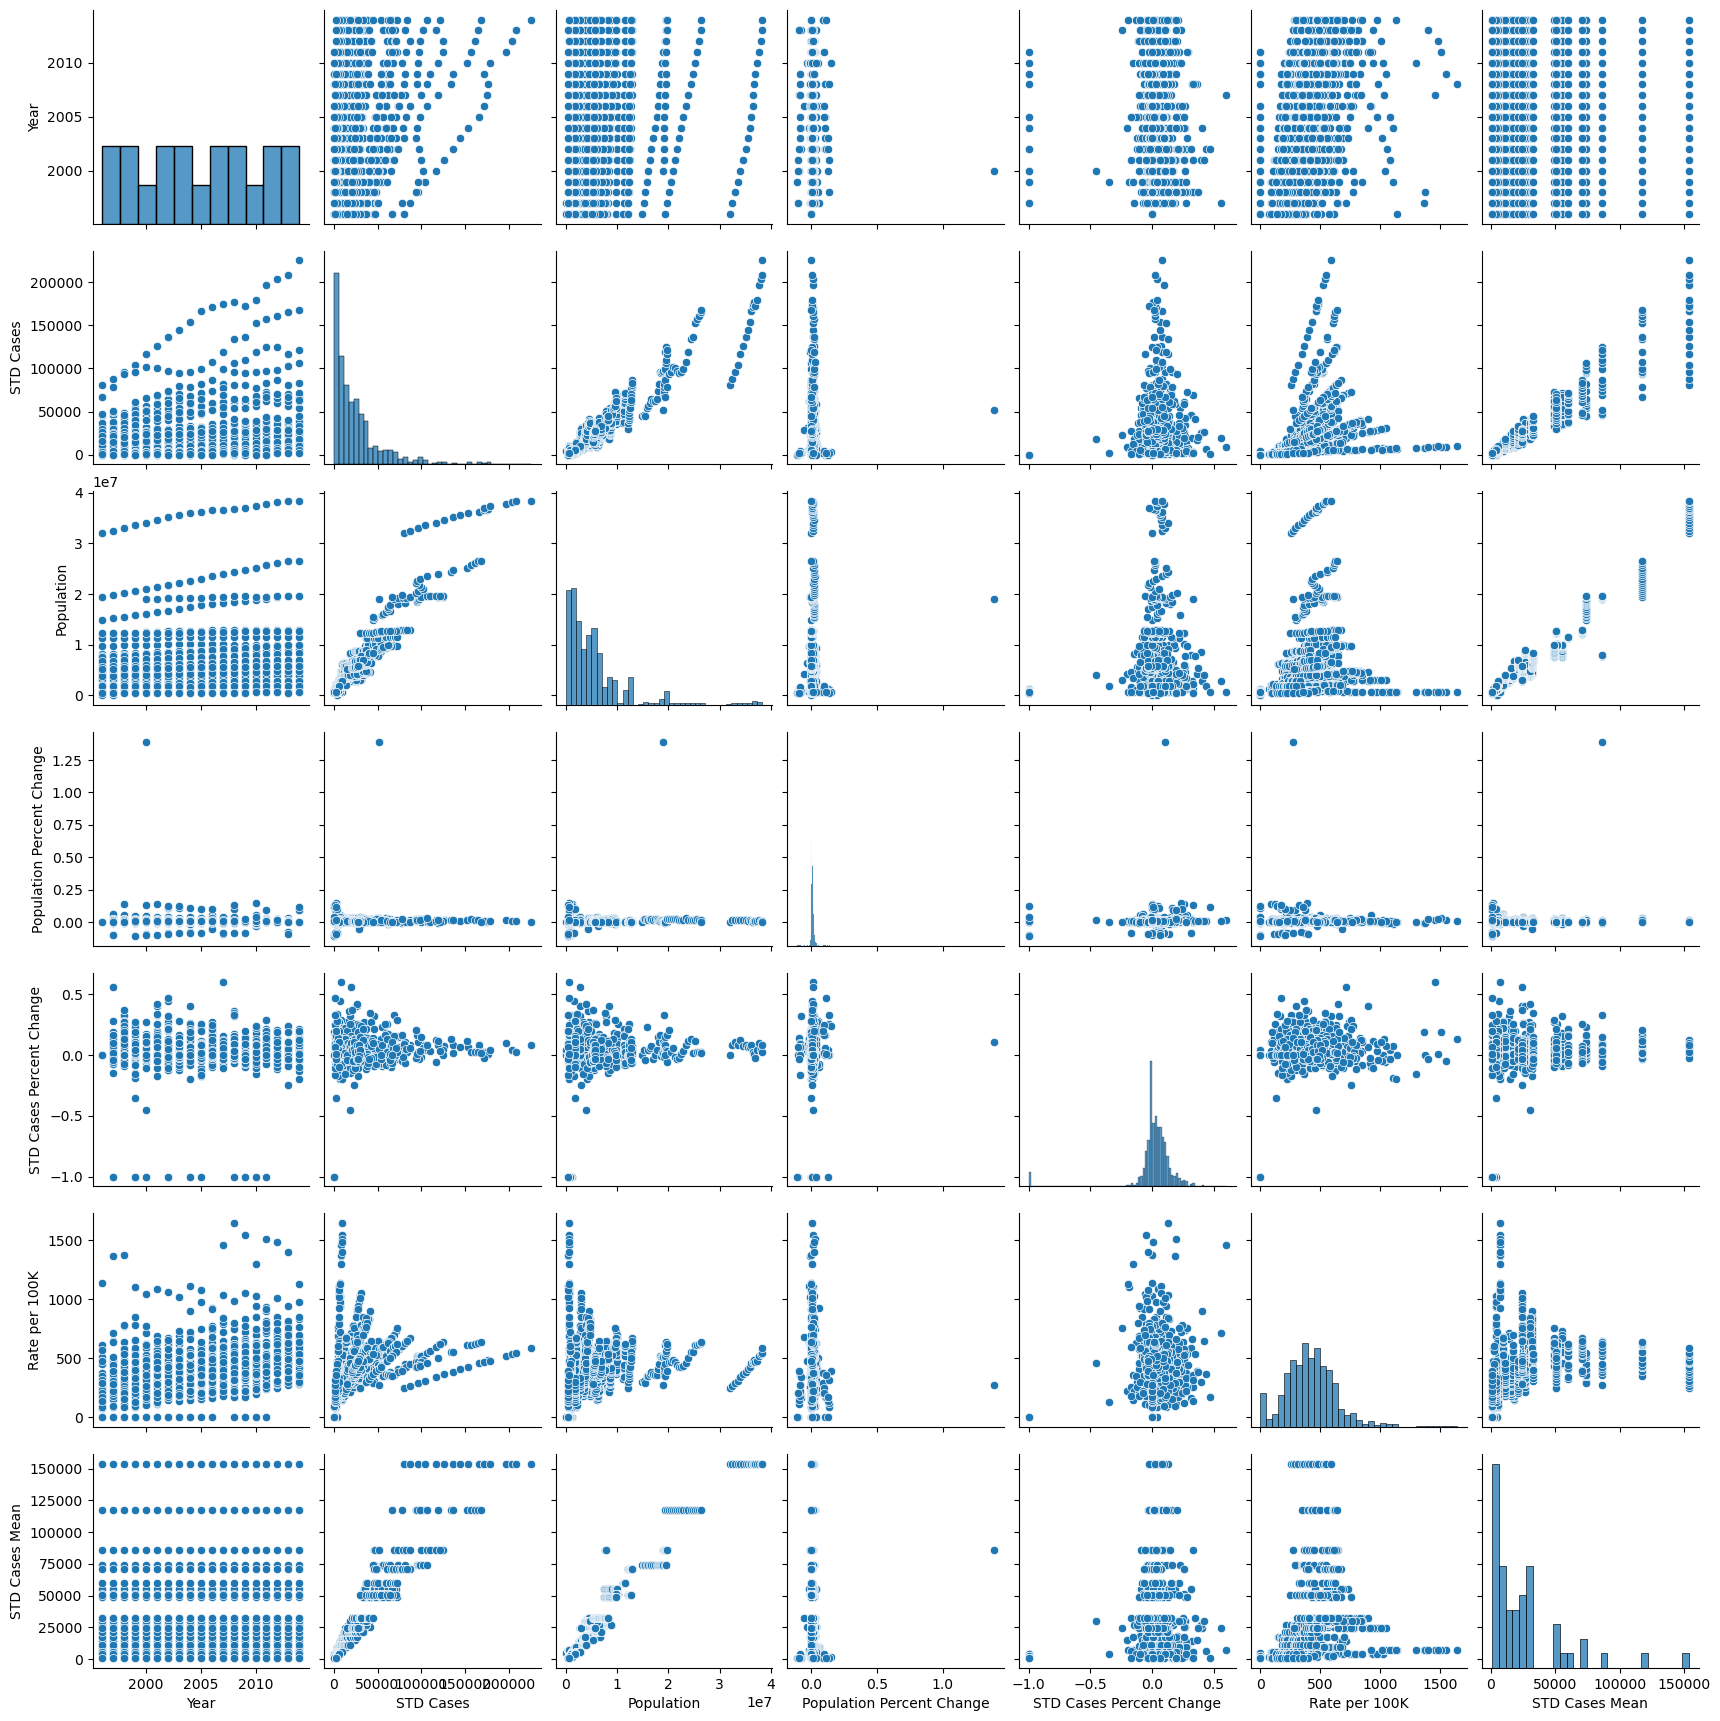

In [41]:
# Create a pair plot of entire data set
g = sns.pairplot(merged_df)

I am interested in seeing the relationship of STDs and years and the correlation between populations and percent chnages.

Categorical Plots

<AxesSubplot:xlabel='STD Cases Percent Change', ylabel='Count'>

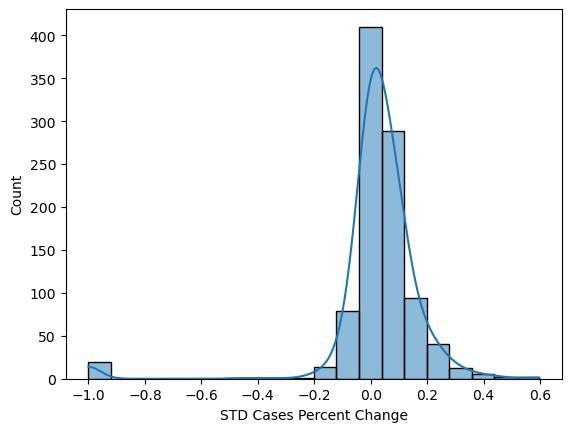

In [42]:
# Use a histogram to visualize the distribution of the variables. 

sns.histplot(merged_df['STD Cases Percent Change'], bins = 20, kde = True)

In [43]:
merged_df.loc[merged_df['STD Cases Percent Change'] < 0, 'STI Rates'] = 'Decreasing'

In [44]:
merged_df.loc[merged_df['STD Cases Percent Change'] == 0, 'STI Rates'] = 'No Change'

In [45]:
merged_df.loc[merged_df['STD Cases Percent Change'] > 0, 'STI Rates'] = 'Increasing'

In [46]:
merged_df['STI Rates'].value_counts(dropna = False)

Increasing    614
Decreasing    261
No Change      94
Name: STI Rates, dtype: int64

In [47]:
merged_df.columns

Index(['State', 'Year', 'STD Cases', 'Population', 'Population Percent Change',
       'STD Cases Percent Change', 'Rate per 100K', 'STD Cases Mean',
       'STI Rates'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1996'),
  Text(1, 0, '1997'),
  Text(2, 0, '1998'),
  Text(3, 0, '1999'),
  Text(4, 0, '2000'),
  Text(5, 0, '2001'),
  Text(6, 0, '2002'),
  Text(7, 0, '2003'),
  Text(8, 0, '2004'),
  Text(9, 0, '2005'),
  Text(10, 0, '2006'),
  Text(11, 0, '2007'),
  Text(12, 0, '2008'),
  Text(13, 0, '2009'),
  Text(14, 0, '2010'),
  Text(15, 0, '2011'),
  Text(16, 0, '2012'),
  Text(17, 0, '2013'),
  Text(18, 0, '2014')])

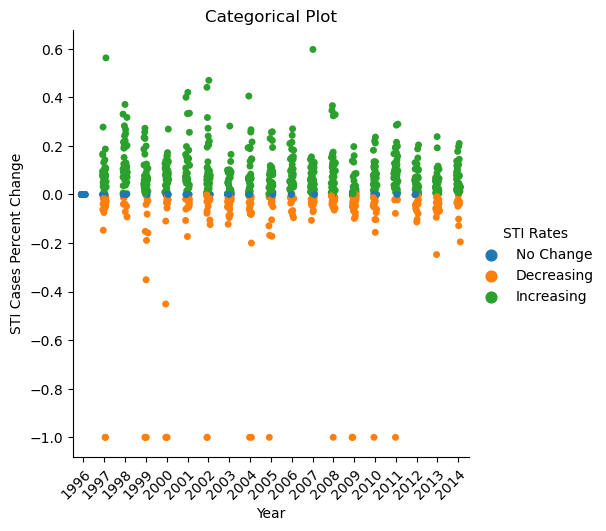

In [48]:
# Create a categorical plot in seaborn using the categories created above
catplot = sns.catplot(data=merged_df, x="Year", y="STD Cases Percent Change", hue="STI Rates")
catplot.set(title="Categorical Plot", xlabel="Year", ylabel="STI Cases Percent Change")
plt.xticks(ha='right', rotation_mode='anchor', rotation=45)

The correlations are starting to answer some of my hypothesis questions. I am also interested in looking at how the individual diseases behaved too. 

In [49]:
#save dataset as Pickle
merged_df.to_pickle('/Users/joshd/Documents/Personal/CareerFoundry/Data Analytics Immersion/6/STI/02 Data/Prepared Data/totals.pkl')